## CNVpytor as Python Module

This document contains example of CNVpytor usage as Python library. For more details check API documentation or use Python buildin help() function.

Overall, the document is segmented into few parts.
1. [Importing and processing of Read Depth Data from BAM file](#1.--Importing-and-processing-of-Read-Depth-Data-from-BAM-file)
  - 1.1 Import cnvpytor and version check
  - 1.2 Setup logging level and help funtionlaties 
  - 1.3 Root object for handling CNVpytor data
  - 1.4 Read depth Information from Alignment file
  - 1.5 Histogram Step
  - 1.6 Partition Step 
  - 1.7 CNV calls
2. [Import SNP information from VCF file](#2.-Import-SNP-information-from-VCF-file)
3. [Visualization of CNVpytor processed data from the formatted MD5 file](#3.-Visualization-of-CNVpytor-processed-data-from-the-formatted-MD5-file)
  - 3.1 Read/Access the CNVpytor formatted MD5 file
  - 3.2 Metadata and content Information 
  - 3.3 Global View of the genome
  - 3.4 Chromosome View of the genom
  - 3.5 Region Plot of the genome

*Example data*: HepG2 BAM and VCF file

*Date* : 2 May, 2021

## 1.  Importing and processing of Read Depth Data from BAM file

### 1.1 Import cnvpytor and version check 

In [1]:
import cnvpytor

In [2]:
print(cnvpytor.__version__)

1.1


### 1.2 Setup logging level and help funtionlaties 
Set up logger to monitor progress (level and format):
Different logging level can be used from the logging module. Options are : CRITICAL, ERROR, WARNING, INFO, DEBUG, NOTSET. Here I have used the warning level for less log. 

In [3]:
import logging

logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger('cnvpytor')


Information about any function can be obtained with Python buildin help() function:

In [61]:
help(cnvpytor.Root.rd)

Help on function rd in module cnvpytor.root:

rd(self, bamfiles, chroms=[], reference_filename=False, overwrite=False)
    Read chromosomes from bam/sam/cram file(s) and store in cnvpytor file.
    
    Parameters
    ----------
    bamfiles : list of str
        List of bam/sam/cram files
    chroms : list of str
        List of chromosomes. Import all available if empty.
    reference_filename : str
        Only for CRAM files - reference genome filename



### 1.3  Root object for handling CNVpytor data
The *'Root'* class is the interface for handling the CNVpytor data. It can create a MD5 file for storing the CNVptor data and provides read and/or write access to the CNVpytor data. 

To create new root class: 

In [5]:
app = cnvpytor.Root("test.pytor", create=True, max_cores=8)

### 1.4 Read depth Information from Alignment file
To import RD signal from bam file, index file (bam.bai) is required:

In [6]:
# To access the all the chromosomes as per reference genome
app.rd(["HepG2_WGS_recal.bam"])

# chroms option in rd function is for specify chromosome name. 

### 1.5 Histogram Step
Calculate histograms with bin sizes 10kbp and 100kbp:

In [7]:
app.calculate_histograms([10000, 100000])

### 1.6 Partition Step 
Calculate partition for the same bin sizes:

In [8]:
app.partition([10000, 100000])

### 1.7 CNV calls
Calculate and print CNV calls:

In [9]:
calls=app.call([10000,100000])

In [10]:
for bin_size in calls:
    print("Bin size: ", bin_size)


Bin size:  10000
Bin size:  100000


Show the call result data for a bin. [Field descriptions](!https://github.com/abyzovlab/CNVpytor/blob/master/GettingStarted.md#predicting-cnv-regions)

In [13]:
for call in calls[100000]:
    print(("{:13}{:>5}{:10}{:10}{:10}{:15.2f}{:15.2e}{:15.2e}").format(*tuple(call)))

deletion      chr1   3800001   4000000    200000           0.26       9.12e+02       0.00e+00
deletion      chr1  13000001  13800000    800000           0.54       1.84e-01       8.90e-38
deletion      chr1  29800001  30100000    300000           0.48       5.54e+02       1.13e-06
deletion      chr1 121400001 142500000  21100000           0.18       3.17e-04       2.87e+09
deletion      chr1 145800001 146500000    700000           0.60       4.88e+00       1.04e-04
duplication   chr2         1  16200000  16200000           1.42       0.00e+00       2.87e+09
duplication   chr2  16400001  89600000  73200000           1.54       0.00e+00       0.00e+00
deletion      chr2  89600001  89800000    200000           0.20       7.87e+02       0.00e+00
deletion      chr2  90500001  91500000   1000000           0.06       1.10e-04       6.09e-95
duplication   chr2 110700001 149600000  38900000           1.49       0.00e+00      3.28e-255
duplication   chr2 150400001 243200000  92800000           1

## 2. Import SNP information from VCF file

Import SNP data from VCF file:

In [14]:
app.vcf(["ENCFF989GDN.vcf.bg.gz"], use_index=True)

Introduce P region mask. This step use strict mask from 1kG project. For hg19 and hg38 this mask data is provided with CNVpythor:

In [15]:
app.mask_snps()

Calculate baf hisotgrams and likelihood function:

In [16]:
app.calculate_baf([10000, 100000])

In [18]:
# close the class object
del app

## 3. Visualization of CNVpytor processed data from the formatted MD5 file

In this section different visualization examples is shown.

### 3.1 Read/Access the CNVpytor formatted MD5 file

In [19]:
# The test.pytor file is loaded in the viewer class and the bin size is set to 100000
view = cnvpytor.Viewer(["test.pytor"], params={} )
view.bin_size = 100000

### 3.2  Metadata and content Information 
The meta and ls function gives the information about the file content. Meta function gives the BAM, VCF file name along with the CNVpytor version used to create the MD5 file. ls function gives the information regarding reference genome name, contigs present in BAM and VCF. It also gives the information regarding available histogram information for RD and SNP. 

In [21]:
view.meta()


Filename 'test.pytor'
---------------------
BAM: HepG2_WGS_recal.bam
Date: 2021-05-02 18:53
VCF: ENCFF989GDN.vcf.bg.gz
Version: 1.1


In [20]:
view.ls()


Filename 'test.pytor'
---------------------
File created: 2021-05-02 18:53 using CNVpytor ver 1.1

Chromosomes with RD signal: chrM, chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY, chr1_gl000191_random, chr1_gl000192_random, chr4_ctg9_hap1, chr4_gl000193_random, chr4_gl000194_random, chr6_apd_hap1, chr6_cox_hap2, chr6_dbb_hap3, chr6_mann_hap4, chr6_mcf_hap5, chr6_qbl_hap6, chr6_ssto_hap7, chr7_gl000195_random, chr8_gl000196_random, chr8_gl000197_random, chr9_gl000198_random, chr9_gl000199_random, chr9_gl000200_random, chr9_gl000201_random, chr11_gl000202_random, chr17_ctg5_hap1, chr17_gl000203_random, chr17_gl000204_random, chr17_gl000205_random, chr17_gl000206_random, chr18_gl000207_random, chr19_gl000208_random, chr19_gl000209_random, chr21_gl000210_random, chrUn_gl000211, chrUn_gl000212, chrUn_gl000213, chrUn_gl000214, chrUn_gl000215, chrUn_gl000216, chrUn_gl000217, chrUn_gl

In [29]:
# Setup Jupyter backend to svg to achive better resolution:
%config InlineBackend.figure_format = 'retina'
%matplotlib nbagg

### 3.3 Global View of the genome
Few different panels are present to visualuze diffenent information. Here is the information for such panels
 - rd 
 - likelihood 
 - snp
 
By defalut, rd is set for the panel. One can switch among panels or select multiple panel at one. 

#### 3.3.1 Default global plot

<IPython.core.display.Javascript object>


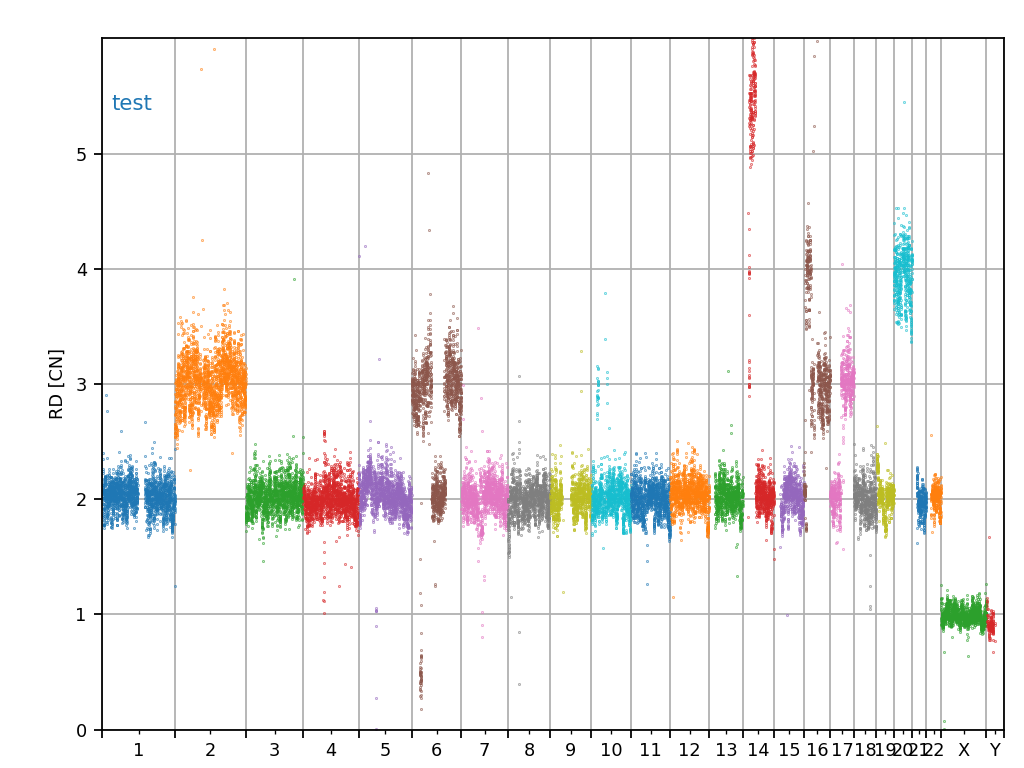

In [64]:
view.rd_use_mask = True # Use P mask to reduce noise
view.markersize = 0.5
view.rd_manhattan_range = [0, 3]

view.global_plot()



In [38]:
# setting view
view.show()


Parameters
    * Q0_range: [-1, 1]
    * annotate: False
    * baf_colors: ['gray', 'black', 'red', 'green', 'blue']
    * bin_size: 100000
    * callers: ['rd_mean_shift']
    * chrom: []
    * contrast: 20
    * dG_range: [-1, inf]
    * dpi: 200
    * file_titles: []
    * grid: auto
    * legend: False
    * lh_colors: ['yellow', 'red']
    * lh_marker: _
    * lh_markersize: 20
    * margins: [0.05, 0.95, 0.1, 0.98, 0.1, 0.2]
    * markersize: auto
    * min_segment_size: 0
    * output_filename: 
    * pN_range: [-1, 1]
    * p_range: [0, inf]
    * panel_size: [12, 10]
    * panels: ['rd']
    * plot: False
    * plot_file: 0
    * plot_files: [0]
            0: test.pytor
    * print_filename: 
    * rd_call: True
    * rd_circular_colors: ['#555555', '#aaaaaa']
    * rd_colors: ['grey', 'black', 'red', 'green', 'blue', 'cyan']
    * rd_corrected: True
    * rd_manhattan_call: False
    * rd_manhattan_range: [0, 6]
    * rd_partition: False
    * rd_range: [0, 6]
    * rd_raw:

#### 3.3.2 Global plot for rd and likelihood function


In [65]:
view.panels = ['rd', 'likelihood']
view.show()



Parameters
    * Q0_range: [-1, 1]
    * annotate: False
    * baf_colors: ['gray', 'black', 'red', 'green', 'blue']
    * bin_size: 100000
    * callers: ['rd_mean_shift']
    * chrom: []
    * contrast: 20
    * dG_range: [-1, inf]
    * dpi: 200
    * file_titles: []
    * grid: auto
    * legend: False
    * lh_colors: ['yellow', 'red']
    * lh_marker: _
    * lh_markersize: 20
    * margins: [0.05, 0.95, 0.1, 0.98, 0.1, 0.2]
    * markersize: 0.5
    * min_segment_size: 0
    * output_filename: 
    * pN_range: [-1, 1]
    * p_range: [0, inf]
    * panel_size: [12, 10]
    * panels: ['rd', 'likelihood']
    * plot: False
    * plot_file: 0
    * plot_files: [0]
            0: test.pytor
    * print_filename: 
    * rd_call: True
    * rd_circular_colors: ['#555555', '#aaaaaa']
    * rd_colors: ['grey', 'black', 'red', 'green', 'blue', 'cyan']
    * rd_corrected: True
    * rd_manhattan_call: False
    * rd_manhattan_range: [0, 3]
    * rd_partition: False
    * rd_range: [0, 6]


<IPython.core.display.Javascript object>


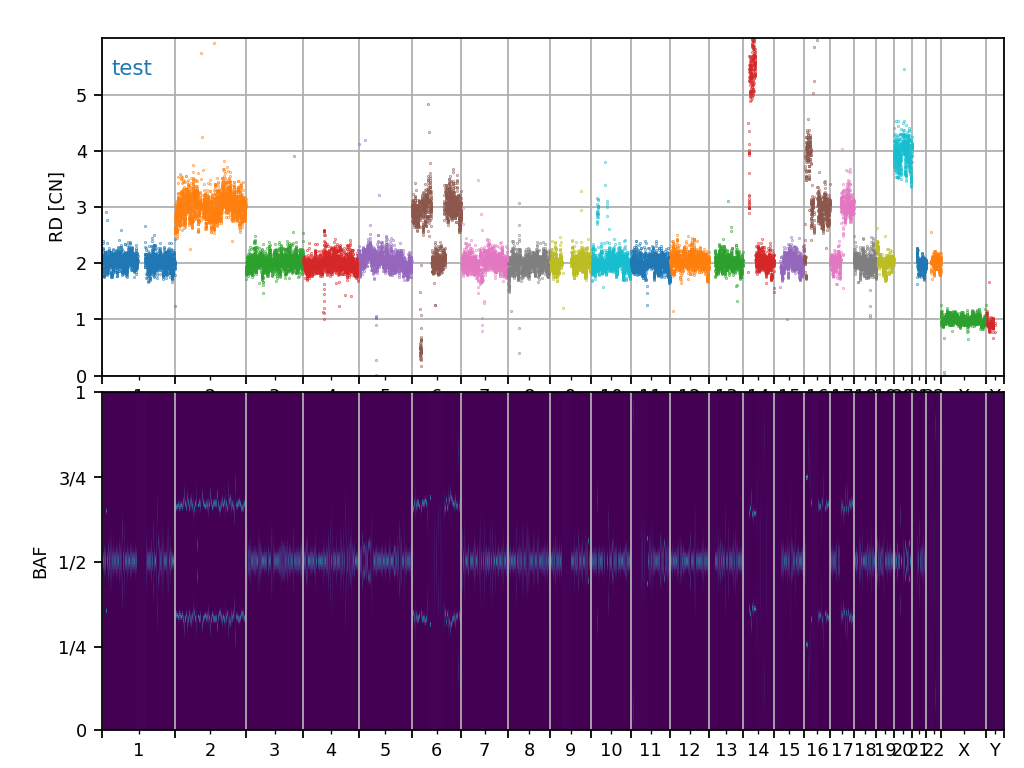

In [66]:
view.global_plot()

#### 3.3.3 Circular Plot

<IPython.core.display.Javascript object>


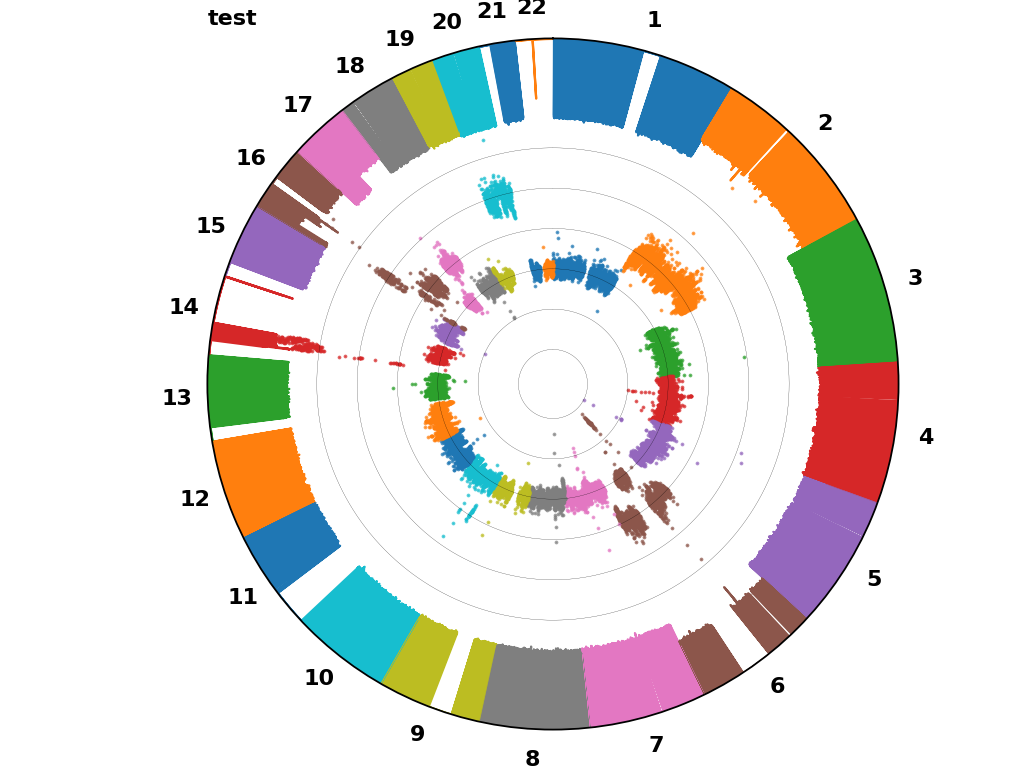

In [52]:
view.circular()

### 3.4 Chromosome View of the genome
Using the panel option, different plot type is selected. To plot a different contigs, chrom option can be set. If it's not set, it plots all the contigs. By Default, its not set.

<IPython.core.display.Javascript object>


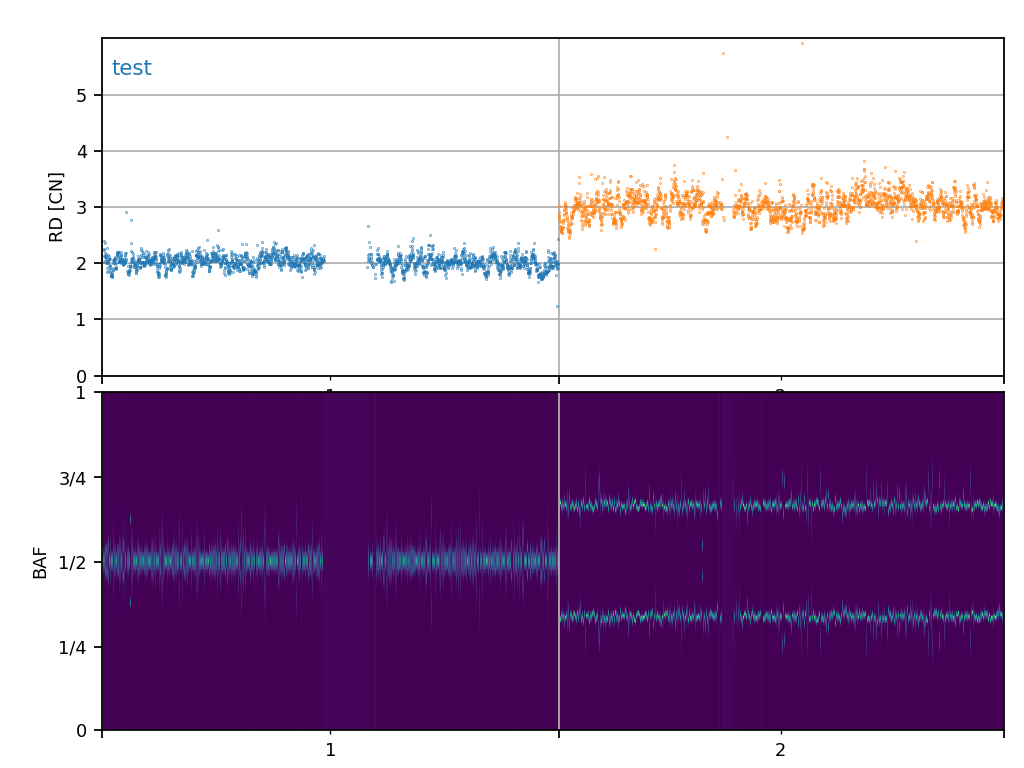

In [67]:
view.chrom = ['chr1', 'chr2']
view.global_plot()

Enable SNP plot for the above two chromosomes. The SNP plot usually takes time, as it plots BAF value for each SNPs and its depend on the number of snps

<IPython.core.display.Javascript object>


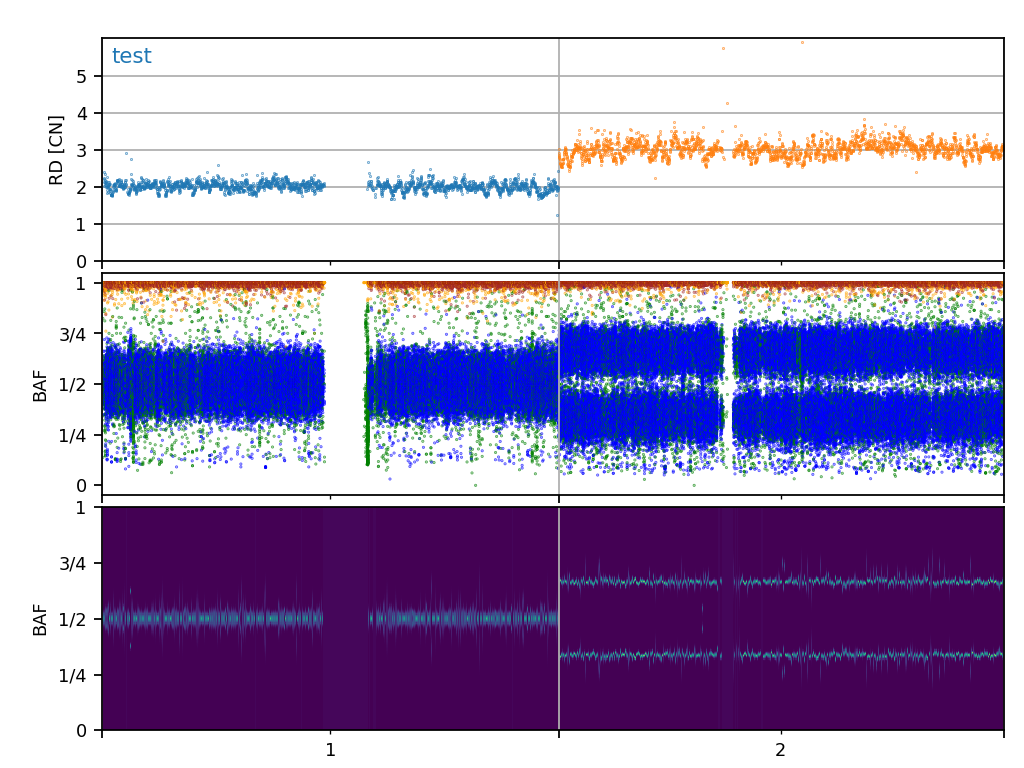

In [68]:
view.panels = ['rd', 'snp', 'likelihood']
view.global_plot()

### 3.5 Region Plot of the genome

<IPython.core.display.Javascript object>


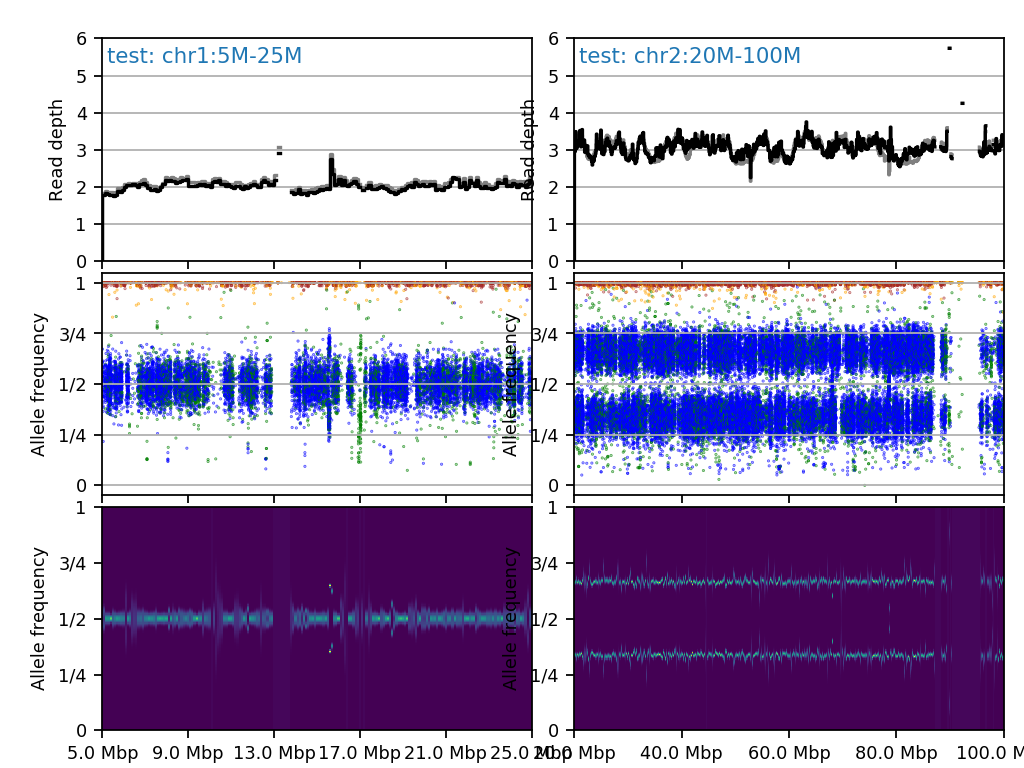

In [70]:

view.grid=[2,1] # specify grid 2 x 1
view.multiple_regions(["chr1:5M-25M","chr2:20M-100M"])

Its showing thee panels as it was previously set. Other panel setup can also be used. 

<IPython.core.display.Javascript object>


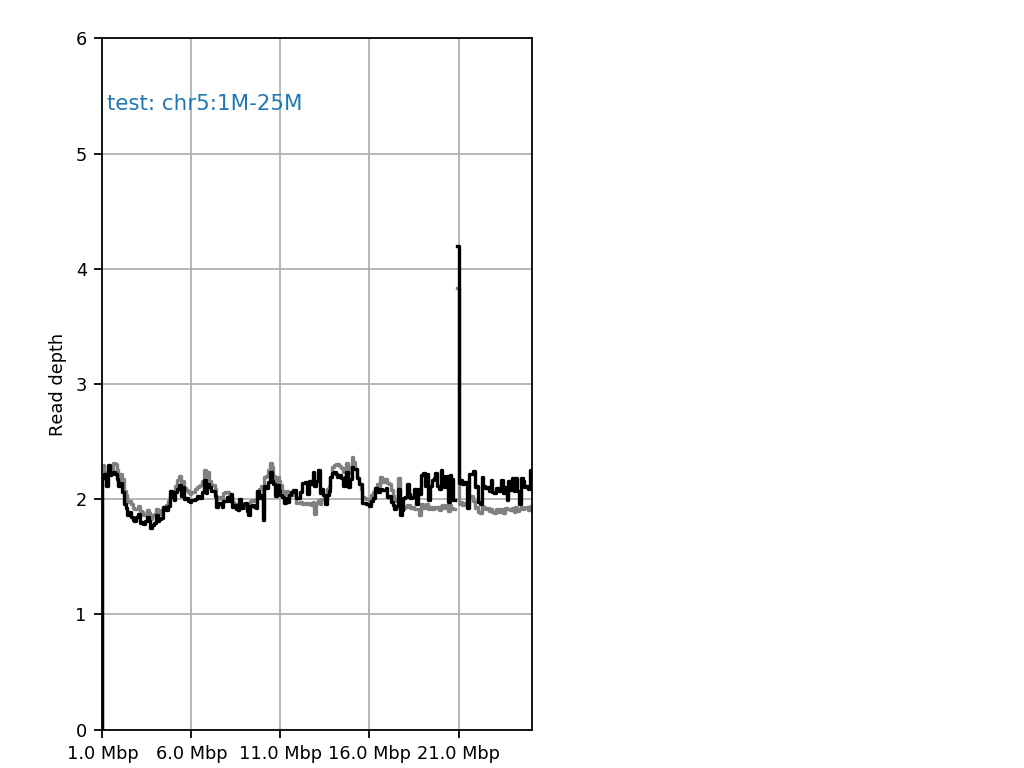

In [79]:
view.panels = ['rd']
view.multiple_regions(['chr5:1M-25M'])